In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/HEK(precursor_swap)/TPRP_10_NEW_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00007.00007.4,1,SPAKPVQTITPHGK/4,0.271,0.067,[2],0,0.009,8,0.136,...,-1,0,0,(),Normal,Unk,Unk,0,441875398,NaN
1,b1906_293T_proteinID_01A_QE3_122212.00009.00009.2,1,PVTAYDGFVQYIPFDDPR/2,0.112,0.003,[2],0,0.496,27,0.048,...,-1,0,0,(),Normal,Unk,Unk,0,372931705,NaN
2,b1906_293T_proteinID_01A_QE3_122212.00013.00013.3,1,DLEDGEVPQHAGK/3,0.318,0.044,[2],0,0.329,62,0.076,...,-1,0,0,(),Normal,Unk,Unk,0,69196212,NaN
3,b1906_293T_proteinID_01A_QE3_122212.00015.00015.4,1,VPFGHAHNHAK/4,0.221,0.040,[2],0,0.254,5,0.121,...,-1,0,0,(),Normal,Unk,Unk,0,518027237,NaN
4,b1906_293T_proteinID_01A_QE3_122212.00016.00016.3,1,NFC[160]SAVQYGNAQIIEC[160]LKENK/3,0.204,0.057,[2],0,-0.002,37,0.079,...,-1,0,0,(),Normal,Unk,Unk,0,345113747,NaN


In [3]:
NNd1 = pd.read_excel('./target_decoy/HEK(precursor_swap)/TPRP_10_NEW_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00001.00001.3,1,PMNVHMDPM[147]K/3,0.189,0.00759,[2],0,0.00271,21,0.0788,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,883244392
1,b1906_293T_proteinID_01A_QE3_122212.00002.00002.3,1,DFEERMK/3,0.129,0.00100,[2],0,0.33500,10,0.0730,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,884980275
2,b1906_293T_proteinID_01A_QE3_122212.00003.00003.2,1,LPLFDLK/2,0.156,0.00400,[2],0,0.00300,47,0.0630,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,822942105
3,b1906_293T_proteinID_01A_QE3_122212.00004.00004.2,1,EQIEQAIEC[160]DQQELDKYK/2,0.100,0.02300,[2],0,0.50100,12,0.0490,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,1087594616
4,b1906_293T_proteinID_01A_QE3_122212.00006.00006.2,1,MMASLLEASFPETDEMR/2,0.118,0.01600,[2],0,0.00700,16,0.0530,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,874867525


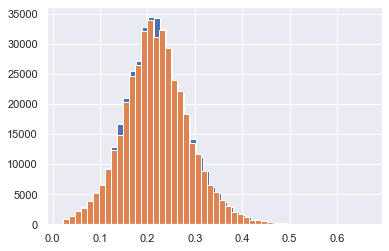

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.01284
0.01268


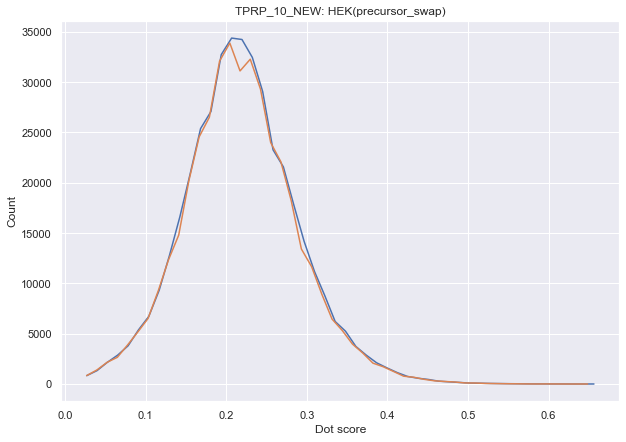

In [5]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('TPRP_10_NEW: HEK(precursor_swap)')
plt.plot(nnt1[1][:-1] + 0.006, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.006, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

420630
414262


In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
"""

score:  0.001
nnt:  420630
nnd:  414262
FDR:  0.9848608040320471


score:  0.002
nnt:  420630
nnd:  414262
FDR:  0.9848608040320471


score:  0.003
nnt:  420630
nnd:  414262
FDR:  0.9848608040320471


score:  0.004
nnt:  420630
nnd:  414262
FDR:  0.9848608040320471


score:  0.005
nnt:  420630
nnd:  414262
FDR:  0.9848608040320471


score:  0.006
nnt:  420630
nnd:  414262
FDR:  0.9848608040320471


score:  0.007
nnt:  420630
nnd:  414262
FDR:  0.9848608040320471


score:  0.008
nnt:  420630
nnd:  414262
FDR:  0.9848608040320471


score:  0.009000000000000001
nnt:  420630
nnd:  414262
FDR:  0.9848608040320471


score:  0.010000000000000002
nnt:  420630
nnd:  414262
FDR:  0.9848608040320471


score:  0.011000000000000003
nnt:  420630
nnd:  414262
FDR:  0.9848608040320471


score:  0.012000000000000004
nnt:  420630
nnd:  414262
FDR:  0.9848608040320471


score:  0.013000000000000005
nnt:  420630
nnd:  414262
FDR:  0.9848608040320471


score:  0.014000000000000005
nnt:  420630
nnd:  414262

nnt:  401149
nnd:  394642
FDR:  0.9837790945509025


score:  0.10500000000000008
nnt:  400581
nnd:  394062
FDR:  0.9837261377848675


score:  0.10600000000000008
nnt:  400000
nnd:  393461
FDR:  0.9836525


score:  0.10700000000000008
nnt:  399418
nnd:  392858
FDR:  0.9835761032302


score:  0.10800000000000008
nnt:  398758
nnd:  392270
FDR:  0.9837294800355103


score:  0.10900000000000008
nnt:  398154
nnd:  391655
FDR:  0.983677170140197


score:  0.11000000000000008
nnt:  397540
nnd:  391069
FDR:  0.9837223927151985


score:  0.11100000000000008
nnt:  396901
nnd:  390461
FDR:  0.9837742913220173


score:  0.11200000000000009
nnt:  396235
nnd:  389810
FDR:  0.9837848751372291


score:  0.11300000000000009
nnt:  395607
nnd:  389157
FDR:  0.9836959406683906


score:  0.11400000000000009
nnt:  394957
nnd:  388474
FDR:  0.9835855548831898


score:  0.11500000000000009
nnt:  394274
nnd:  387768
FDR:  0.9834987851088329


score:  0.11600000000000009
nnt:  393577
nnd:  387096
FDR:  0.9835330

nnt:  234275
nnd:  228416
FDR:  0.9749909294632376


score:  0.20800000000000016
nnt:  231764
nnd:  225795
FDR:  0.974245353031532


score:  0.20900000000000016
nnt:  229139
nnd:  223262
FDR:  0.9743518126552005


score:  0.21000000000000016
nnt:  226410
nnd:  220668
FDR:  0.974638929375911


score:  0.21100000000000016
nnt:  223669
nnd:  217967
FDR:  0.9745069723564732


score:  0.21200000000000016
nnt:  221029
nnd:  215371
FDR:  0.974401549117989


score:  0.21300000000000016
nnt:  218313
nnd:  212761
FDR:  0.9745686239481844


score:  0.21400000000000016
nnt:  215654
nnd:  210116
FDR:  0.9743199755163363


score:  0.21500000000000016
nnt:  213004
nnd:  207549
FDR:  0.9743901522976094


score:  0.21600000000000016
nnt:  210426
nnd:  204963
FDR:  0.9740383792877306


score:  0.21700000000000016
nnt:  207860
nnd:  202439
FDR:  0.9739199461175791


score:  0.21800000000000017
nnt:  205161
nnd:  199802
FDR:  0.9738790510867075


score:  0.21900000000000017
nnt:  202530
nnd:  197210
FDR: 

nnt:  36032
nnd:  34349
FDR:  0.9532915186500888


score:  0.3150000000000002
nnt:  35250
nnd:  33604
FDR:  0.953304964539007


score:  0.3160000000000002
nnt:  34479
nnd:  32878
FDR:  0.9535659386873169


score:  0.3170000000000002
nnt:  33694
nnd:  32196
FDR:  0.95554104588354


score:  0.3180000000000002
nnt:  32984
nnd:  31512
FDR:  0.955372301722047


score:  0.31900000000000023
nnt:  32262
nnd:  30791
FDR:  0.9544045626433575


score:  0.32000000000000023
nnt:  31523
nnd:  30123
FDR:  0.9555879833772166


score:  0.32100000000000023
nnt:  30863
nnd:  29399
FDR:  0.9525645595049088


score:  0.32200000000000023
nnt:  30178
nnd:  28740
FDR:  0.9523493935979853


score:  0.32300000000000023
nnt:  29518
nnd:  28122
FDR:  0.9527068229554848


score:  0.32400000000000023
nnt:  28842
nnd:  27508
FDR:  0.9537480063795853


score:  0.32500000000000023
nnt:  28203
nnd:  26920
FDR:  0.9545083856327341


score:  0.32600000000000023
nnt:  27579
nnd:  26329
FDR:  0.9546756590159179


score:  0

nnt:  2080
nnd:  2057
FDR:  0.9889423076923077


score:  0.4310000000000003
nnt:  2030
nnd:  2003
FDR:  0.9866995073891626


score:  0.43200000000000033
nnt:  1979
nnd:  1964
FDR:  0.9924204143506822


score:  0.43300000000000033
nnt:  1930
nnd:  1915
FDR:  0.9922279792746114


score:  0.43400000000000033
nnt:  1881
nnd:  1856
FDR:  0.986709197235513


score:  0.43500000000000033
nnt:  1835
nnd:  1815
FDR:  0.989100817438692


score:  0.43600000000000033
nnt:  1796
nnd:  1756
FDR:  0.977728285077951


score:  0.43700000000000033
nnt:  1754
nnd:  1704
FDR:  0.9714937286202965


score:  0.43800000000000033
nnt:  1705
nnd:  1663
FDR:  0.975366568914956


score:  0.43900000000000033
nnt:  1656
nnd:  1613
FDR:  0.9740338164251208


score:  0.44000000000000034
nnt:  1611
nnd:  1576
FDR:  0.978274363749224


score:  0.44100000000000034
nnt:  1577
nnd:  1541
FDR:  0.9771718452758402


score:  0.44200000000000034
nnt:  1532
nnd:  1498
FDR:  0.9778067885117493


score:  0.44300000000000034
nnt: 

nnt:  32
nnd:  15
FDR:  0.46875


score:  0.5800000000000004
nnt:  29
nnd:  15
FDR:  0.5172413793103449


score:  0.5810000000000004
nnt:  28
nnd:  15
FDR:  0.5357142857142857


score:  0.5820000000000004
nnt:  26
nnd:  14
FDR:  0.5384615384615384


score:  0.5830000000000004
nnt:  25
nnd:  14
FDR:  0.56


score:  0.5840000000000004
nnt:  25
nnd:  13
FDR:  0.52


score:  0.5850000000000004
nnt:  25
nnd:  12
FDR:  0.48


score:  0.5860000000000004
nnt:  23
nnd:  12
FDR:  0.5217391304347826


score:  0.5870000000000004
nnt:  23
nnd:  12
FDR:  0.5217391304347826


score:  0.5880000000000004
nnt:  21
nnd:  12
FDR:  0.5714285714285714


score:  0.5890000000000004
nnt:  20
nnd:  12
FDR:  0.6


score:  0.5900000000000004
nnt:  20
nnd:  12
FDR:  0.6


score:  0.5910000000000004
nnt:  19
nnd:  12
FDR:  0.631578947368421


score:  0.5920000000000004
nnt:  18
nnd:  11
FDR:  0.6111111111111112


score:  0.5930000000000004
nnt:  17
nnd:  10
FDR:  0.5882352941176471


score:  0.5940000000000004
nnt:

'\n결과\n'